# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [51]:
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import sklearn as sk
from sklearn.datasets import load_digits, fetch_20newsgroups
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, Binarizer, KBinsDiscretizer,
    MinMaxScaler, StandardScaler, PolynomialFeatures
)
from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfTransformer, TfidfVectorizer
)

In [52]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [53]:
countries = pd.read_csv("countries.csv")

In [54]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(1)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [55]:
# Sua análise começa aqui.
countries.shape
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density          object
Coastline_ratio      object
Net_migration        object
Infant_mortality     object
GDP                 float64
Literacy             object
Phones_per_1000      object
Arable               object
Crops                object
Other                object
Climate              object
Birthrate            object
Deathrate            object
Agriculture          object
Industry             object
Service              object
dtype: object

In [56]:
countries.head(1)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"


In [57]:
countries.Net_migration.unique()

array(['23,06', '-4,93', '-0,39', '-20,71', '6,6', '0', '10,76', '-6,15',
       '0,61', '-6,47', '3,98', '2', '-4,9', '-2,2', '1,05', '-0,71',
       '-0,31', '2,54', '1,23', '2,49', '-1,32', '0,31', '-0,03', '10,01',
       '3,59', '-4,58', '-1,8', '-0,06', '5,96', '-12,07', '18,75',
       '-0,11', '-0,4', '-0,17', nan, '0,51', '-0,07', '1,58', '-1,58',
       '0,43', '0,97', '2,48', '-13,87', '-3,22', '-8,58', '-0,22',
       '-3,74', '-3,16', '1,41', '-3,14', '0,95', '0,66', '6,27', '2,94',
       '1,57', '1,6', '-4,7', '2,18', '-0,64', '2,35', '-8,37', '-13,92',
       '-0,15', '-1,67', '3,84', '-3,06', '-1,57', '-2,07', '-3,4',
       '-1,99', '5,24', '0,86', '2,38', '-0,84', '4,99', '5,36', '0,68',
       '2,07', '-4,92', '2,76', '6,59', '-3,35', '-0,1', '14,18', '-2,45',
       '-2,23', '-0,74', '4,85', '8,97', '4,86', '-1,45', '-0,33',
       '-6,04', '-0,05', '-0,9', '6,78', '-4,87', '-20,99', '-0,26',
       '7,75', '-0,98', '2,91', '-0,41', '4,05', '-1,22', '-0,67', '0,26'

In [58]:
for coluna in ['Pop_density', 'Coastline_ratio', 'Net_migration', 'Infant_mortality', 
               'Literacy', 'Phones_per_1000', 'Arable', 'Crops', 'Other', 'Climate', 
               'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']:
    if(isinstance(countries[coluna], object)):
        countries[coluna] = countries[coluna].str.replace('.', '')
        countries[coluna] = countries[coluna].str.replace(',', '.').astype('float')
countries.head(1)

countries['Country'] = countries['Country'].str.strip()
countries['Region'] = countries['Region'].str.strip()

In [59]:
countries.Net_migration.unique()

array([ 2.306e+01, -4.930e+00, -3.900e-01, -2.071e+01,  6.600e+00,
        0.000e+00,  1.076e+01, -6.150e+00,  6.100e-01, -6.470e+00,
        3.980e+00,  2.000e+00, -4.900e+00, -2.200e+00,  1.050e+00,
       -7.100e-01, -3.100e-01,  2.540e+00,  1.230e+00,  2.490e+00,
       -1.320e+00,  3.100e-01, -3.000e-02,  1.001e+01,  3.590e+00,
       -4.580e+00, -1.800e+00, -6.000e-02,  5.960e+00, -1.207e+01,
        1.875e+01, -1.100e-01, -4.000e-01, -1.700e-01,        nan,
        5.100e-01, -7.000e-02,  1.580e+00, -1.580e+00,  4.300e-01,
        9.700e-01,  2.480e+00, -1.387e+01, -3.220e+00, -8.580e+00,
       -2.200e-01, -3.740e+00, -3.160e+00,  1.410e+00, -3.140e+00,
        9.500e-01,  6.600e-01,  6.270e+00,  2.940e+00,  1.570e+00,
        1.600e+00, -4.700e+00,  2.180e+00, -6.400e-01,  2.350e+00,
       -8.370e+00, -1.392e+01, -1.500e-01, -1.670e+00,  3.840e+00,
       -3.060e+00, -1.570e+00, -2.070e+00, -3.400e+00, -1.990e+00,
        5.240e+00,  8.600e-01,  2.380e+00, -8.400e-01,  4.990e

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [60]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return sorted(countries['Region'].unique())
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [61]:
def q2():
    countries.Pop_density.unique()
    discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")

    discretizer.fit(countries[["Pop_density"]])

    score_bins = discretizer.transform(countries[["Pop_density"]])

    p = np.percentile(score_bins, 90, axis =1, keepdims=True)
    return int(np.sum(p >=9))

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [62]:
def q3():
    #countries['Climate'] = countries['Climate'].str.strip()
    #one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int)
    #aux_countries = countries.dropna(subset=['Climate'])
    #atributos_region = one_hot_encoder.fit(aux_countries[["Region"]])
    #atributos_climate = one_hot_encoder.fit(aux_countries[["Climate"]])
    #return int(atributos_region.shape[1] +  atributos_climate.shape[1])
    dum_df = pd.get_dummies(countries, columns=["Climate"], prefix=["Cli"])
    dum_df = pd.get_dummies(countries, columns=["Region"], prefix=["Reg"])
    #Dos outros dois modos que tentei o resultado foi 17 devido ao valor NA na Climate
    #será que devo substituir o NA por outro valor? 0 por exemplo? 
    return len(countries["Region"].unique()) + len(countries["Climate"].unique())   

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [63]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [64]:
def q4():
    data_missing = countries.copy()
    num_pipeline = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("minmax_scaler", StandardScaler())
    ])
    columns = np.concatenate((data_missing.columns[data_missing.dtypes=="int64"], data_missing.columns[data_missing.dtypes=="float64"]), 
                             axis=0) 
    pipeline_transformation = num_pipeline.fit(data_missing[columns])
    return float(pipeline_transformation.transform([test_country[2:]])[0][data_missing.columns.get_loc("Arable") - 2].round(3))

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [65]:
countries.Net_migration.unique()

array([ 2.306e+01, -4.930e+00, -3.900e-01, -2.071e+01,  6.600e+00,
        0.000e+00,  1.076e+01, -6.150e+00,  6.100e-01, -6.470e+00,
        3.980e+00,  2.000e+00, -4.900e+00, -2.200e+00,  1.050e+00,
       -7.100e-01, -3.100e-01,  2.540e+00,  1.230e+00,  2.490e+00,
       -1.320e+00,  3.100e-01, -3.000e-02,  1.001e+01,  3.590e+00,
       -4.580e+00, -1.800e+00, -6.000e-02,  5.960e+00, -1.207e+01,
        1.875e+01, -1.100e-01, -4.000e-01, -1.700e-01,        nan,
        5.100e-01, -7.000e-02,  1.580e+00, -1.580e+00,  4.300e-01,
        9.700e-01,  2.480e+00, -1.387e+01, -3.220e+00, -8.580e+00,
       -2.200e-01, -3.740e+00, -3.160e+00,  1.410e+00, -3.140e+00,
        9.500e-01,  6.600e-01,  6.270e+00,  2.940e+00,  1.570e+00,
        1.600e+00, -4.700e+00,  2.180e+00, -6.400e-01,  2.350e+00,
       -8.370e+00, -1.392e+01, -1.500e-01, -1.670e+00,  3.840e+00,
       -3.060e+00, -1.570e+00, -2.070e+00, -3.400e+00, -1.990e+00,
        5.240e+00,  8.600e-01,  2.380e+00, -8.400e-01,  4.990e

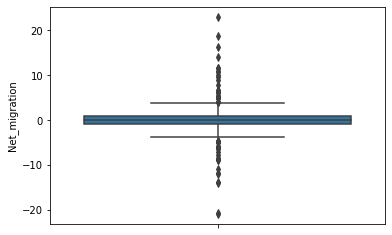

In [66]:
Net_migration_outlier = countries.Net_migration.copy()
sns.boxplot(Net_migration_outlier, orient="vertical");

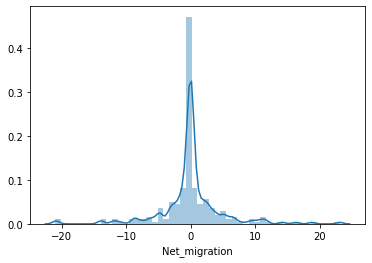

In [67]:
sns.distplot(Net_migration_outlier.dropna());

In [68]:
def q5():
    q1 = Net_migration_outlier.quantile(0.25)
    q3 = Net_migration_outlier.quantile(0.75)
    iqr = q3 - q1

    non_outlier_interval_iqr = [q1 - 1.5 * iqr, q3 + 1.5 * iqr]
    return len(Net_migration_outlier[(Net_migration_outlier < non_outlier_interval_iqr[0])]), len(Net_migration_outlier[(Net_migration_outlier > non_outlier_interval_iqr[1])]), False

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [69]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroups = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
count_vectorizer = CountVectorizer()
newsgroups_counts = count_vectorizer.fit_transform(newsgroups.data)
words_idx = sorted([count_vectorizer.vocabulary_.get(f"{word.lower()}") for word in
[u"phone"]])

In [70]:
def q6():
    newsgroups_counts = count_vectorizer.fit_transform(newsgroups.data)
    return int(sum(newsgroups_counts[:-1, words_idx].toarray())[0])
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [71]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(newsgroups.data)
newsgroups_tfidf_vectorized = tfidf_vectorizer.transform(newsgroups.data)
sum(newsgroups_tfidf_vectorized[:-1, words_idx].toarray())[0].round(3)

8.888

In [72]:
def q7():
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer.fit(newsgroups.data)
    newsgroups_tfidf_vectorized = tfidf_vectorizer.transform(newsgroups.data)
    return float(sum(newsgroups_tfidf_vectorized[:-1, words_idx].toarray())[0].round(3))
q7()

8.888